# ML model error representation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel(r'data\dataframe.xlsx') #dataframe50
df.head()

,Unnamed: 0,Sensor,Date,Index,Model,Accuracy,Water precision,Water f1-score,Water test pixels,Oil precision,Oil f1-score,Oil test pixels
0,0,AVIRIS,1,NDOI,KNN,0.968586,0.959036,0.977887,399,0.993671,0.945783,174
1,1,AVIRIS,1,NDOI,Decision tree,0.961606,0.956416,0.972906,399,0.975000,0.934132,174
2,2,AVIRIS,1,NDOI,Random Forest,0.958115,0.956204,0.970370,399,0.962963,0.928571,174
3,3,AVIRIS,1,NDOI,Ada Boost,0.966841,0.956731,0.976687,399,0.993631,0.942598,174
4,4,AVIRIS,1,RAI,KNN,0.973822,0.968293,0.981459,399,0.987730,0.955490,174


ValueError: x and y must have same first dimension, but have shapes (4,) and (103,)

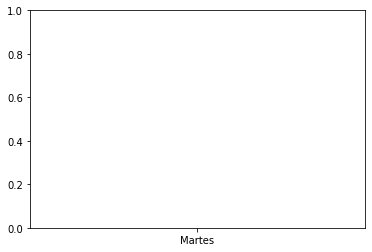

In [6]:
x_values2 = ['Martes', 'Miércoles', 'Jueves', 'Viernes']
y_values2 = df['Accuracy'].value_counts().tolist()
plt.plot(x_values2, y_values2, color='#a12424', linestyle='--', marker='o')

In [100]:
Av_1 = df[(df.Sensor == "AVIRIS") & (df.Date == 1)]
Av_2 = df[(df.Sensor == "AVIRIS") & (df.Date == 2)]
Hi_1 = df[(df.Sensor == "HICO") & (df.Date == 1)]
Hi_2 = df[(df.Sensor == "HICO") & (df.Date == 2)]
Me_1 = df[(df.Sensor == "MERIS") & (df.Date == 1)]
Me_2 = df[(df.Sensor == "MERIS") & (df.Date == 2)]


In [101]:
y_val = Av_1['Accuracy'].tolist()
x_val = Av_1['Index'].tolist()


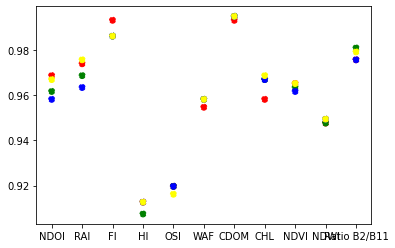

In [89]:
col = {'KNN':'red', 'Decision tree':'green', 'Random Forest':'blue', 'Ada Boost':'yellow'}
#plt.plot(x_val, y_val, marker='o', linestyle='--')
plt.scatter(x_val, y_val, linestyle='--', marker='o', color = Av_1.Model.map(col))


<AxesSubplot:xlabel='Index'>

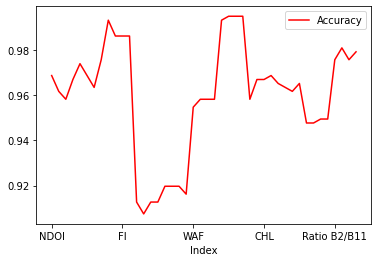

In [75]:
Av_1.plot.line(x = "Index", y = 'Accuracy', color = Av_1.Model.map(col))

array([[<AxesSubplot:title={'center':'Accuracy'}, xlabel='Index'>,
        <AxesSubplot:title={'center':'Oil f1-score'}, xlabel='Index'>],
       [<AxesSubplot:title={'center':'Water f1-score'}, xlabel='Index'>,
        <AxesSubplot:>]], dtype=object)

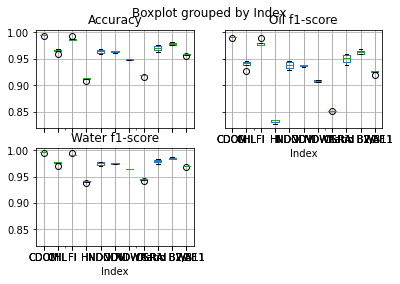

In [106]:
Av_1.boxplot(column=["Accuracy","Oil f1-score","Water f1-score"], by="Index")


array([[<AxesSubplot:title={'center':'Accuracy'}, xlabel='Index'>,
        <AxesSubplot:title={'center':'Oil f1-score'}, xlabel='Index'>],
       [<AxesSubplot:title={'center':'Water f1-score'}, xlabel='Index'>,
        <AxesSubplot:>]], dtype=object)

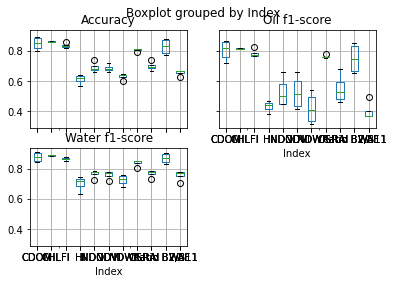

In [107]:
Av_2.boxplot(column=["Accuracy","Oil f1-score","Water f1-score"], by="Index")


array([[<AxesSubplot:title={'center':'Accuracy'}, xlabel='Index'>,
        <AxesSubplot:title={'center':'Oil f1-score'}, xlabel='Index'>],
       [<AxesSubplot:title={'center':'Water f1-score'}, xlabel='Index'>,
        <AxesSubplot:>]], dtype=object)

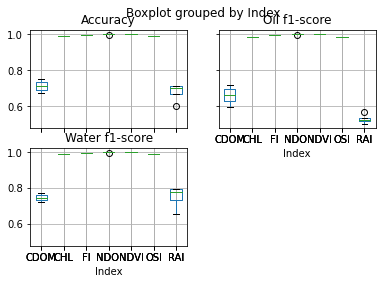

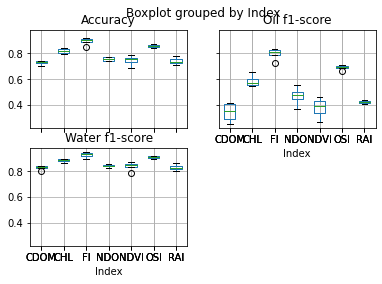

In [109]:
Hi_1.boxplot(column=["Accuracy","Oil f1-score","Water f1-score"], by="Index")
Hi_2.boxplot(column=["Accuracy","Oil f1-score","Water f1-score"], by="Index")


array([[<AxesSubplot:title={'center':'Accuracy'}, xlabel='Index'>,
        <AxesSubplot:title={'center':'Oil f1-score'}, xlabel='Index'>],
       [<AxesSubplot:title={'center':'Water f1-score'}, xlabel='Index'>,
        <AxesSubplot:>]], dtype=object)

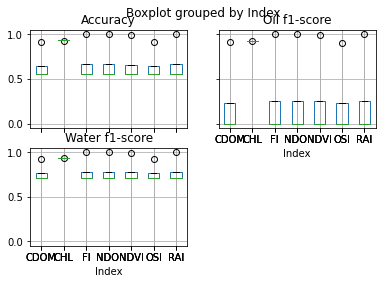

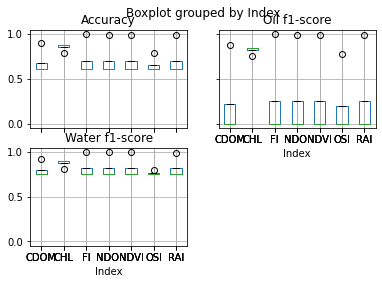

In [110]:
Me_1.boxplot(column=["Accuracy","Oil f1-score","Water f1-score"], by="Index")
Me_2.boxplot(column=["Accuracy","Oil f1-score","Water f1-score"], by="Index")